# Plotting accuracy with different degrees of polynomial expansion- Full Matrix, with and without preprocessing

In [63]:
import numpy as np
from implementations import *
from cross_validation import *
from data_preprocessing import *
from proj1_helpers import *
import matplotlib.pyplot as plt
import math

print('loading data'+"\n")
DATA_TEST_PATH = '../data/train.csv'
y,tX,ids = load_csv_data(DATA_TEST_PATH)
print('data loaded')

tXunstd = remove_features(tX)
tXunstd = replace_aberrant_values(tX)
tXunstd= kill_correlation(tX,0.95)

tXprep=preprocess_data(tX)

maxdegree=12

accsunstd=np.empty((5,maxdegree))
accsprep=np.empty((5,maxdegree))

degree = np.linspace(1,maxdegree,num=maxdegree,dtype=int)
for deg in degree:
    print("degree=", deg)

    accprep, testloss, trainloss, weights = cross_validation_for_leastsquares(y, tXprep, deg)
    accunstd, testloss, trainloss, weights = cross_validation_for_leastsquares(y, tXunstd, deg)

    accsprep[:,deg-1]=accprep
    accsunstd[:,deg-1]=accunstd
    

loading data

data loaded
degree= 1
test error: 0.340522946975
train error: 0.340436461491
accuracy: 0.744356
test error: 0.340103214115
train error: 0.340010773233
accuracy: 0.744208
test error: 0.340103214115
train error: 0.340010773233
accuracy: 0.744208
degree= 2
test error: 0.415415103341
train error: 0.315882080213
accuracy: 0.774284
test error: 0.379791955623
train error: 0.324259904767
accuracy: 0.76214
test error: 0.379791955623
train error: 0.324259904767
accuracy: 0.76214
degree= 3
test error: 21.8269956257
train error: 0.305239225575
accuracy: 0.784912
test error: 108760.960395
train error: 107991.340179
accuracy: 0.508264
test error: 108760.960395
train error: 107991.340179
accuracy: 0.508264
degree= 4
test error: 102.742498599
train error: 0.299567754276
accuracy: 0.792064
test error: 932361.434021
train error: 925288.790853
accuracy: 0.512472
test error: 932361.434021
train error: 925288.790853
accuracy: 0.512472
degree= 5
test error: 2054142.09705
train error: 0.2966224

In [92]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)    

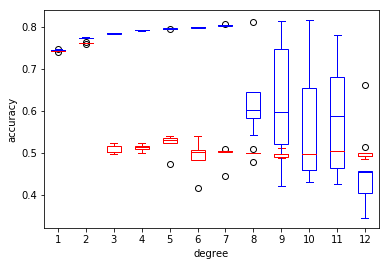

In [93]:
fig, ax = plt.subplots()
draw_plot(accsunstd, 'red','white')
draw_plot(accsprep, 'blue', 'white')
#draw_plot(np.mean(accs,axis=0), 'green', 'white')

ax.set_ylabel('accuracy')
ax.set_xlabel('degree')

plt.show()

# Plotting accuracy with different degrees of polynomial expansion- Split data

In [3]:
import numpy as np
from implementations import *
from cross_validation import *
from data_preprocessing import *
from proj1_helpers import *
import matplotlib.pyplot as plt
import math

print('loading data'+"\n")
DATA_TEST_PATH = '../data/train.csv'
y,tX,ids = load_csv_data(DATA_TEST_PATH)
print('data loaded')

maxdegree=12

accs=np.empty((3,5,maxdegree))
trainlosses=np.empty((3,5,maxdegree))

jet_tX = jet(tX)


means=[]
devs=[]
degree = np.linspace(1,maxdegree,num=maxdegree,dtype=int)
#cleans -999 and standardizes
for i in range(len(jet_tX)):
    #preprocess every train subset
    preprocessed_tX = preprocess_data(tX[jet_tX[i]])
    print(preprocessed_tX.shape)
    for deg in degree:
        print("degree=",deg)
        acc, testloss, trainloss, weights = cross_validation_for_leastsquares(y[jet_tX[i]], preprocessed_tX, deg)
        accs[i,:,deg-1]=acc
        trainlosses[i,:,deg-1]=trainloss


loading data

data loaded
(99913, 17)
degree= 1
test error: 0.272348016017
train error: 0.27212168776
accuracy: 0.816594935442
degree= 2
test error: 3.19252531803
train error: 0.252431442888
accuracy: 0.825663096787
degree= 3
test error: 1.10203186924
train error: 0.24443858267
accuracy: 0.829686718046
degree= 4
test error: 34179422.732
train error: 0.241024145617
accuracy: 0.832529276349
degree= 5
test error: 748330383738.0
train error: 0.238078578536
accuracy: 0.836933239916
degree= 6
test error: 1.01657528657e+15
train error: 4.20984557271
accuracy: 0.583385046542
degree= 7
test error: 3.36472843183e+17
train error: 319.094075915
accuracy: 0.457291562406
degree= 8
test error: 2.79342025529e+22
train error: 91273.2404945
accuracy: 0.582224001601
degree= 9
test error: 1.64885789703e+27
train error: 270279.007293
accuracy: 0.751166049445
degree= 10
test error: 1.63127698991e+30
train error: 7606.20279224
accuracy: 0.508347512761
degree= 11
test error: 6.71740199658e+34
train error: 393

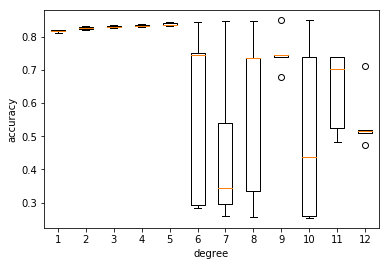

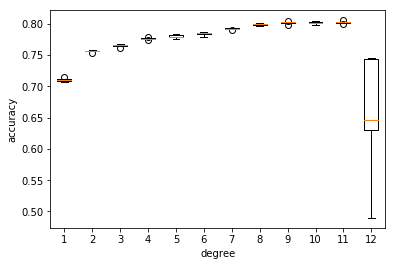

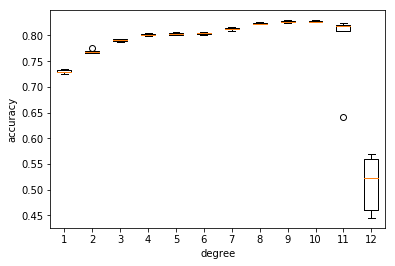

In [6]:
fig1, ax1 = plt.subplots()
ax1.boxplot(accs[0])

fig2, ax2 = plt.subplots()
ax2.boxplot(accs[1])

fig3, ax3 = plt.subplots()
ax3.boxplot(accs[2])

ax1.set_ylabel('accuracy')
ax1.set_xlabel('degree')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('degree')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('degree')
plt.show()

# A good overfitting example: train error goes down, but accuracy falls.

[ 1  2  3  4  5  6  7  8  9 10 11]
(5, 11)


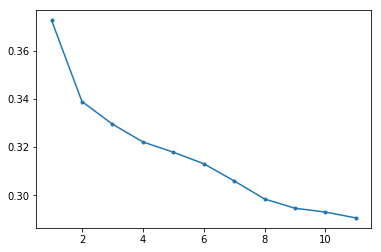

In [7]:
fig1, ax1 = plt.subplots()
degreeplt=degree[0:11]
print(degreeplt)
trainlossplt=trainlosses[1,:,0:11]
print(trainlossplt.shape)
ax1.plot(degreeplt,np.mean(trainlossplt,axis=0),marker=".")
plt.show()